Dataset Shape: (5000, 9)

Data Types:
CustomerID           int64
Age                  int64
Gender              object
Tenure               int64
Annual_Income      float64
Spending_Score     float64
Credit_Score         int64
Online_Activity    float64
True_Segment        object
dtype: object

Missing Values:
CustomerID         0
Age                0
Gender             0
Tenure             0
Annual_Income      0
Spending_Score     0
Credit_Score       0
Online_Activity    0
True_Segment       0
dtype: int64


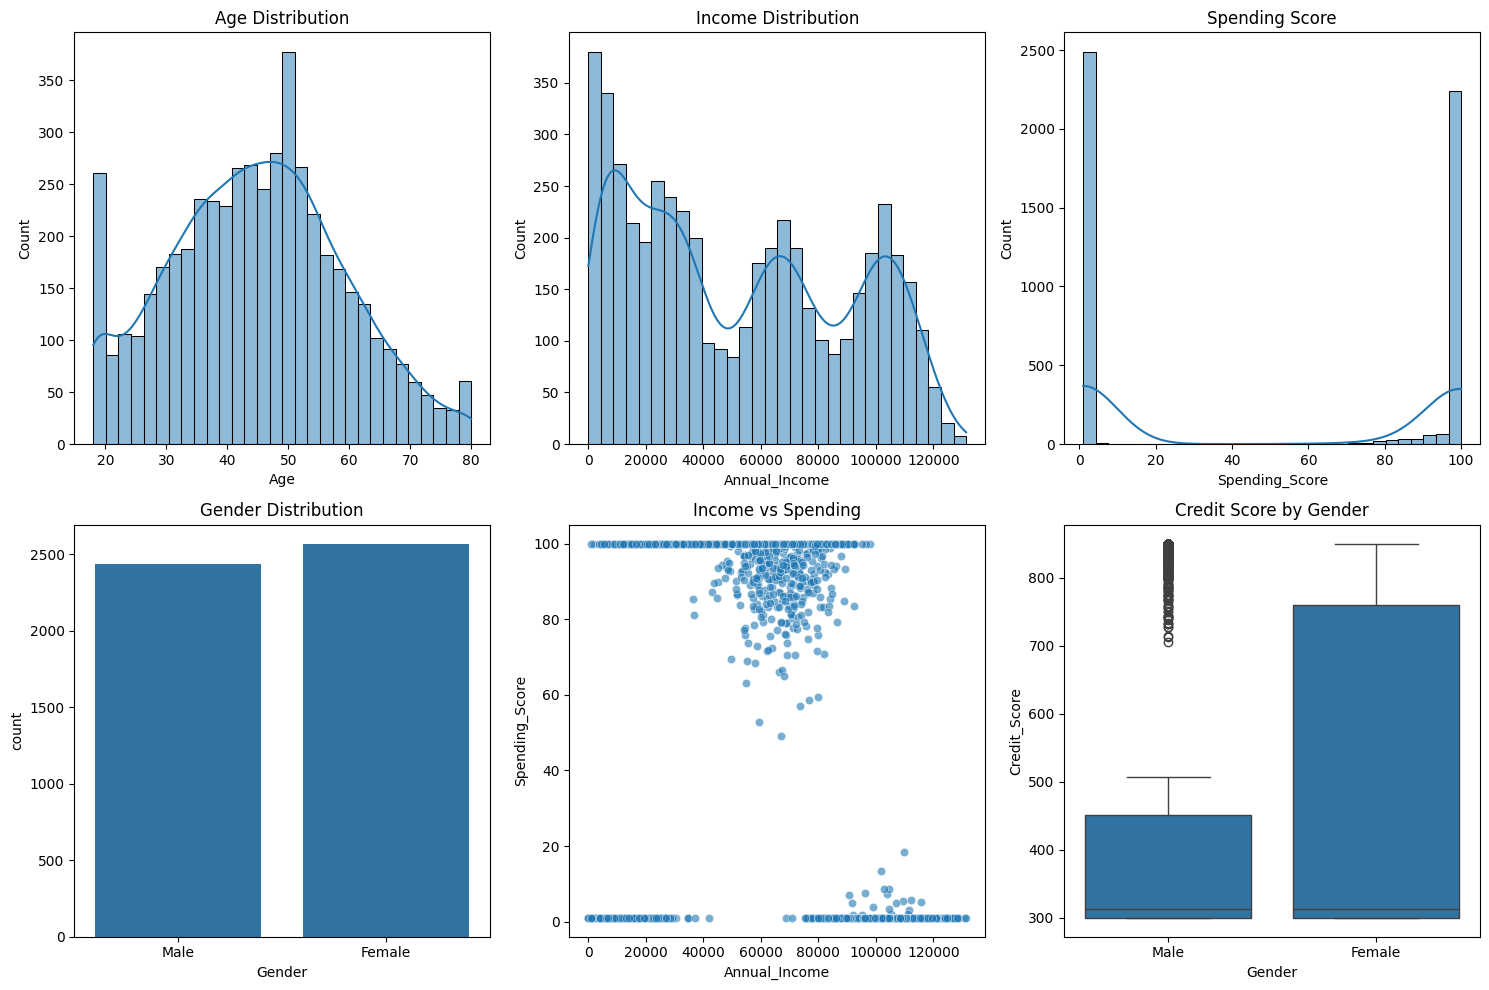

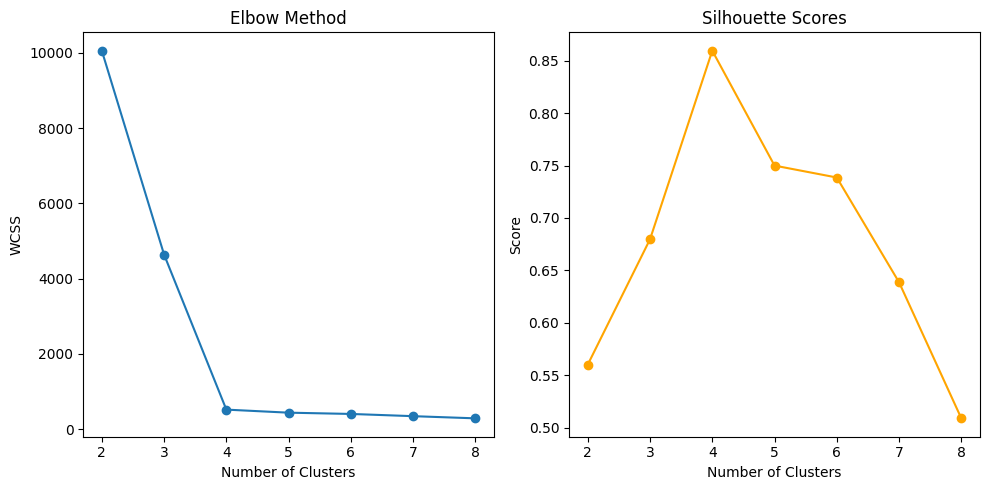


Cluster Profiles:


,Annual_Income,Spending_Score,Credit_Score,Online_Activity,Age,Count,Percentage
Cluster,,,,,,,
0,8968.0,1.0,306.2,5.0,45.5,1250,25.0
1,103397.1,1.1,343.4,1.0,44.5,1250,25.0
2,30191.5,100.0,834.0,4.4,44.5,1250,25.0
3,66620.5,97.2,304.8,5.0,44.6,1250,25.0


/tmp/ipython-input-602294994.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y='Credit_Score', palette='viridis')
/tmp/ipython-input-602294994.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_profile.reset_index(), x='Cluster', y='Percentage',


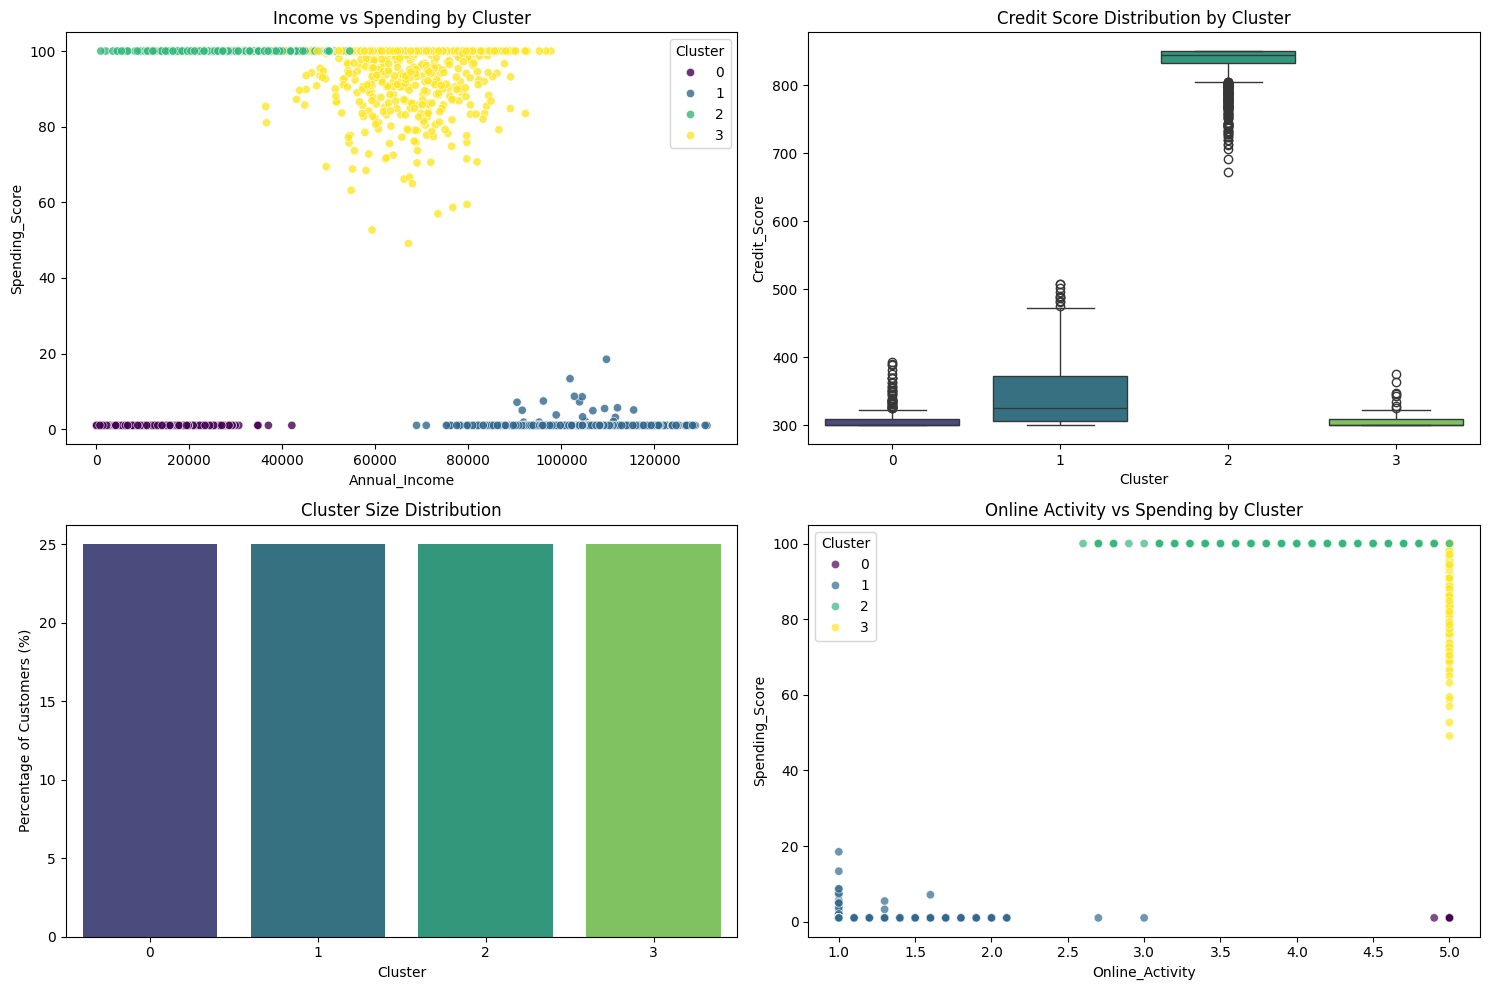


Total Target Audience Size: 1350 customers

MARKETING RECOMMENDATIONS

**Budget-Conscious Shoppers** (25.0% of customers)
- Avg Income: $8,968
- Spending Score: 1/100
- Online Activity: 5.0/5
- Credit Score: 306
  → Strategy: Value bundles, discount promotions

**Digital-First Consumers** (25.0% of customers)
- Avg Income: $103,397
- Spending Score: 1/100
- Online Activity: 1.0/5
- Credit Score: 343
  → Strategy: Digital retargeting, social media engagement

**Credit-Reliant Customers** (25.0% of customers)
- Avg Income: $30,192
- Spending Score: 100/100
- Online Activity: 4.4/5
- Credit Score: 834
  → Strategy: Credit-based offers, installment payment options

**Premium Loyalists** (25.0% of customers)
- Avg Income: $66,621
- Spending Score: 97/100
- Online Activity: 5.0/5
- Credit Score: 305
  → Strategy: Exclusive VIP programs, early access to new products

**Lookalike Audience Strategy**
- Identified 100 customers similar to Premium Loyalists
- Targeting recommendations:
  → Launc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


All files downloaded successfully!


In [2]:
# --- STEP 1: SETUP & DATA LOADING ---
!pip install pandas numpy matplotlib seaborn scikit-learn -q
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load your downloaded dataset
df = pd.read_csv('customer_segmentation_dataset.csv')

# --- STEP 2: EXPLORATORY DATA ANALYSIS ---
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize distributions
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(2,3,2)
sns.histplot(df['Annual_Income'], bins=30, kde=True)
plt.title('Income Distribution')

plt.subplot(2,3,3)
sns.histplot(df['Spending_Score'], bins=30, kde=True)
plt.title('Spending Score')

plt.subplot(2,3,4)
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')

plt.subplot(2,3,5)
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', alpha=0.6)
plt.title('Income vs Spending')

plt.subplot(2,3,6)
sns.boxplot(data=df, x='Gender', y='Credit_Score')
plt.title('Credit Score by Gender')

plt.tight_layout()
plt.savefig('eda_visualizations.png', dpi=120)
plt.show()

# --- STEP 3: DATA PREPROCESSING ---
# Select features for segmentation
features = ['Annual_Income', 'Spending_Score', 'Credit_Score', 'Online_Activity']
X = df[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- STEP 4: CUSTOMER SEGMENTATION ---
# Find optimal clusters
wcss = []
sil_scores = []
k_range = range(2, 9)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow curve
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.subplot(1,2,2)
plt.plot(k_range, sil_scores, marker='o', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.tight_layout()
plt.savefig('cluster_selection.png', dpi=120)
plt.show()

# Choose optimal k (based on plots)
optimal_k = 4

# Train final model
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# --- STEP 5: SEGMENT ANALYSIS ---
# Cluster profiles
cluster_profile = df.groupby('Cluster').agg({
    'Annual_Income': 'mean',
    'Spending_Score': 'mean',
    'Credit_Score': 'mean',
    'Online_Activity': 'mean',
    'Age': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})

cluster_profile['Percentage'] = (cluster_profile['Count'] / len(df)) * 100
print("\nCluster Profiles:")
display(cluster_profile.round(1))

# Visualize clusters
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score',
                hue='Cluster', palette='viridis', alpha=0.8)
plt.title('Income vs Spending by Cluster')

plt.subplot(2,2,2)
sns.boxplot(data=df, x='Cluster', y='Credit_Score', palette='viridis')
plt.title('Credit Score Distribution by Cluster')

plt.subplot(2,2,3)
sns.barplot(data=cluster_profile.reset_index(), x='Cluster', y='Percentage',
            palette='viridis')
plt.title('Cluster Size Distribution')
plt.ylabel('Percentage of Customers (%)')

plt.subplot(2,2,4)
sns.scatterplot(data=df, x='Online_Activity', y='Spending_Score',
                hue='Cluster', palette='viridis', alpha=0.7)
plt.title('Online Activity vs Spending by Cluster')

plt.tight_layout()
plt.savefig('cluster_analysis.png', dpi=120)
plt.show()

# --- STEP 6: LOOKALIKE MODELING ---
# Identify target segment (e.g., high-value customers)
target_cluster = 3  # Typically the cluster with high income & spending
target_df = df[df['Cluster'] == target_cluster]

# Calculate centroid of target segment
target_centroid = kmeans.cluster_centers_[target_cluster]

# Find lookalikes in other clusters
df['Distance_to_Target'] = np.linalg.norm(X_scaled - target_centroid, axis=1)

# Get top lookalikes (excluding existing target customers)
lookalike_candidates = df[df['Cluster'] != target_cluster]
lookalikes = lookalike_candidates.nsmallest(100, 'Distance_to_Target')

# Combine target customers with lookalikes
final_audience = pd.concat([target_df, lookalikes])
print(f"\nTotal Target Audience Size: {len(final_audience)} customers")

# Save results
final_audience.to_csv('target_audience.csv', index=False)

# --- STEP 7: BUSINESS INSIGHTS ---
print("\n" + "="*50)
print("MARKETING RECOMMENDATIONS")
print("="*50)

# Cluster interpretation
cluster_names = {
    0: "Budget-Conscious Shoppers",
    1: "Digital-First Consumers",
    2: "Credit-Reliant Customers",
    3: "Premium Loyalists"
}

# Generate insights
for cluster_id in range(optimal_k):
    profile = cluster_profile.loc[cluster_id]
    print(f"\n**{cluster_names[cluster_id]}** ({profile['Percentage']:.1f}% of customers)")
    print(f"- Avg Income: ${profile['Annual_Income']:,.0f}")
    print(f"- Spending Score: {profile['Spending_Score']:.0f}/100")
    print(f"- Online Activity: {profile['Online_Activity']:.1f}/5")
    print(f"- Credit Score: {profile['Credit_Score']:.0f}")

    # Recommendations
    if cluster_id == 3:
        print("  → Strategy: Exclusive VIP programs, early access to new products")
    elif cluster_id == 1:
        print("  → Strategy: Digital retargeting, social media engagement")
    elif cluster_id == 0:
        print("  → Strategy: Value bundles, discount promotions")
    else:
        print("  → Strategy: Credit-based offers, installment payment options")

print("\n**Lookalike Audience Strategy**")
print(f"- Identified {len(lookalikes)} customers similar to Premium Loyalists")
print("- Targeting recommendations:")
print("  → Launch lookalike campaigns on Facebook/Google Ads")
print("  → Offer trial premium membership")
print("  → Use similar messaging as for Premium Loyalists")

# --- STEP 8: SAVE FINAL OUTPUTS ---
# Save segmented dataset
df.to_csv('segmented_customers.csv', index=False)

# Download files
from google.colab import files
files.download('segmented_customers.csv')
files.download('target_audience.csv')
print("\nAll files downloaded successfully!")